# Generalized Linear Model


## Introduction

Ordinary linear regression predicts the expected value of a given unknown quantity (the response variable, a random variable) as a linear combination of a set of observed values (predictors). This implies that a constant change in a predictor leads to a constant change in the response variable (i.e. a linear-response model). 

However, these assumptions are inappropriate for some types of response variables. For example, in cases where the response variable is expected to be always positive and varying over a wide range, constant input changes lead to geometrically varying, rather than constantly varying, output changes.

Generalized linear models cover all these situations by allowing for response variables that have arbitrary distributions (rather than simply normal distributions), and for an arbitrary function of the response variable (the link function) to vary linearly with the predicted values (rather than assuming that the response itself must vary linearly).

## Overview

In a Generalized Linear Model (GLM), each outcome Y of the dependent variables is assumed to be generated from a particular distribution in an exponential family.


**Distributions:**
- Gaussian regression
- Poisson regression
- Binomial regression (classification)
- Quasibinomial regression
- Multinomial classification
- Gamma regression
- Ordinal regression
- Negative Binomial regression
- Tweedie distribution

\begin{align}
E(Y) = \mu = g^{-1}(X\beta) \\
\end{align}

where E(Y) is the expected value of Y; Xβ is the linear predictor, a linear combination of unknown parameters β; g is the link function.

There are three components in generalized linear models.

1. Linear predictor
        Linear Combination of params
2. Link function
        Linear Model relate to the response variable (g)

3. Probability distribution
        An exponential family of probability distributions

> Why to use Generalized Linear Model (GLM)?
> The relationship between X and Y does not look linear. It’s more likely to be exponential.
The variance of Y does not look constant with regard to X. Here, the variance of Y seems to increase when X increases.
As Y represents the number of products, it always has to be a positive integer. In other words, Y is a discrete variable. However, the normal distribution used for linear regression assumes continuous variables. This also means the prediction by linear regression can be negative. It’s not appropriate for this kind of count data.



### Resources:

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html

http://statmath.wu.ac.at/courses/heather_turner/glmCourse_001.pdf

https://en.wikipedia.org/wiki/Generalized_linear_model

https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab


# Code

In [17]:
from sklearn import linear_model
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
cols = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
IrisData = pd.DataFrame(iris.data, columns=cols)
IrisData['target'] = iris.target
IrisData

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
IrisData.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


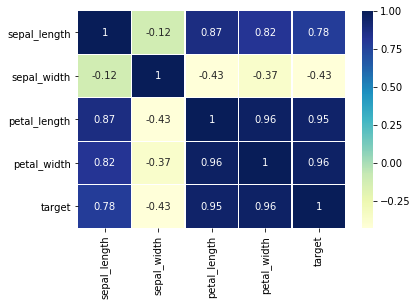

In [24]:
# Correlation Matrix
sns.heatmap(IrisData.corr(), 
            cmap = 'YlGnBu',
            annot = True,
            linewidths = .3,
            linecolor = 'white'
           )

In [50]:
# plt.plot(IrisData['sepal_length'], IrisData['target'], 'ro')
cols = list(IrisData.columns)
cols = cols[:len(cols) - 1]
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

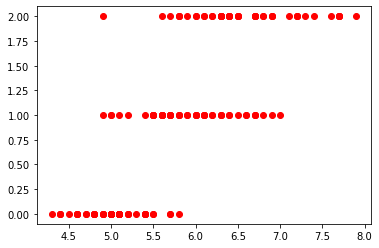

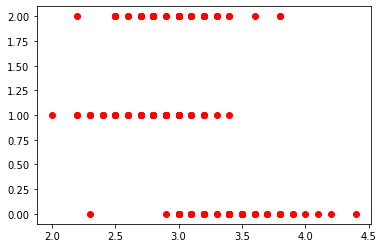

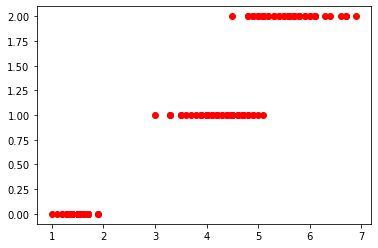

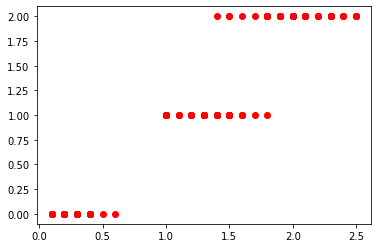

In [52]:
for col in cols:
    plt.plot(IrisData[col], IrisData['target'], 'ro')
    plt.show()